In [1]:
## "Exploring Lending Home Dataset - Reza Taeb"


##  First Part: importing esential packages, loading dataset and getting familiar with dataset, 
##              initial exploratory data anlaysis, initial data wrangling 

# import essential packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from uszipcode import ZipcodeSearchEngine



In [2]:
# loading dataset and getting familiar with it

dataset_name = 'LH_data_scientist_intern_excercise.csv'
df = pd.read_csv(dataset_name)

# adjust output view
pd.set_option('display.width', 120)
sns.set()

# Getting familiar with dataset 

print (df.info())
print (df.head())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158800 entries, 0 to 158799
Data columns (total 11 columns):
property_id           158800 non-null int64
transaction_amount    158800 non-null int64
loan_amount           158800 non-null float64
buyer                 158800 non-null object
lender                158800 non-null object
transaction_date      158800 non-null object
property_type         158800 non-null object
property_address      94217 non-null object
seller                158800 non-null object
year_built            158800 non-null int64
sqft                  158800 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 13.3+ MB
None
   property_id  transaction_amount  loan_amount                               buyer         lender transaction_date  \
0     27885942              670000          0.0       SWEENEY,THOMAS R & MICHELLE H  * Undisclosed       2012-02-27   
1     26400001              260000          0.0  DOUGHERTY,HERBERT III & JENNIFER M  * Undis

/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


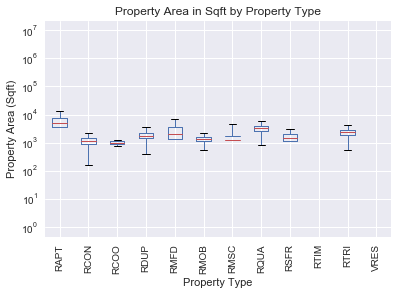

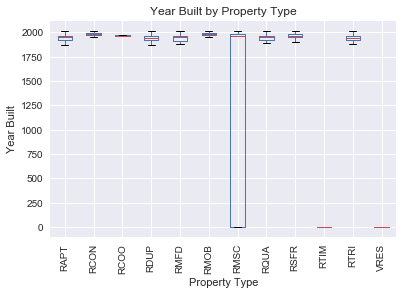

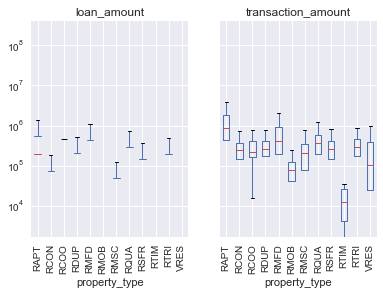

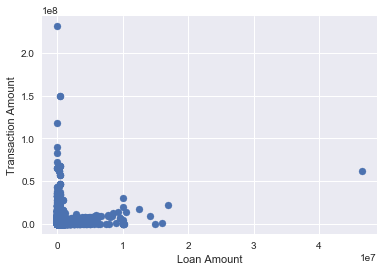

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6743 entries, 8 to 158772
Data columns (total 11 columns):
property_id           6743 non-null int64
transaction_amount    6743 non-null int64
loan_amount           6743 non-null float64
buyer                 6743 non-null object
lender                6743 non-null object
transaction_date      6743 non-null object
property_type         6743 non-null object
property_address      5426 non-null object
seller                6743 non-null object
year_built            6743 non-null int64
sqft                  6743 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 632.2+ KB


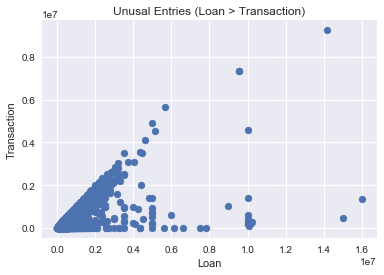

In [3]:
# Initial visulaziation to get some sense of data and mostly for recognizing missing or unusal entries 

## Previous part shows some strange information about "Property Area", "Year Built", "Loan Amount", and "Transaction"
## So it needs more exploration: 


# 1 - Checking Property Area by Property Type

df.boxplot(column='sqft', by='property_type', rot=90)
plt.yscale('log')
plt.title('Property Area in Sqft by Property Type')
plt.suptitle("")
plt.xlabel('Property Type')
plt.ylabel('Property Area (Sqft)')
plt.show()

## There are some very small (area < 50 sqft), which I assume that they are wrong value 
## but since they are just few enteries (11) , I will just remove "0" areas and leave small ones in dataset.()



# 2 - Checking Year Built 

df.boxplot(column='year_built' , by='property_type', rot=90)
plt.title('Year Built by Property Type')
plt.suptitle("")
plt.xlabel('Property Type')
plt.ylabel('Year Built')
plt.show()

## Some zero values are seen, needed to replace with NaN.



# 3 - Cheacking Loan Amount and Transaction Amount

df.boxplot(column=['loan_amount','transaction_amount'] , by='property_type', rot=90 )
plt.yscale('log')
plt.suptitle("")
plt.ylabel('Amount (Dollar)')
plt.show()

## Checking if in some cases "loan" > "Transaction" which may be unusal and need more exploration
plt.scatter(df['loan_amount'],df['transaction_amount'])
plt.xlabel('Loan Amount')
plt.ylabel('Transaction Amount')
plt.show()

# More exploration on Unusal Observations 
unusal_df = df[df['loan_amount'] > df['transaction_amount']]
unusal_df.head()
unusal_df.info()
plt.scatter(unusal_df['loan_amount'], unusal_df['transaction_amount'])
plt.xlabel('Loan')
plt.ylabel('Transaction')
plt.title('Unusal Entries (Loan > Transaction)')
plt.suptitle("")
plt.show()

## Here is the other area that we probably need to correct our current data, however since there may be some resoans
## for these observation I will keep them in dataset. 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158800 entries, 0 to 158799
Data columns (total 15 columns):
property_id           158800 non-null int64
transaction_amount    158800 non-null int64
loan_amount           158800 non-null float64
buyer                 158800 non-null object
lender                48113 non-null object
transaction_date      158800 non-null datetime64[ns]
property_type         158800 non-null object
property_address      94217 non-null object
seller                158800 non-null object
year_built            149564 non-null float64
sqft                  152158 non-null float64
zip_code              158800 non-null object
city                  158800 non-null object
county                158800 non-null object
region                158800 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 18.2+ MB
None
   property_id  transaction_amount  loan_amount                 buyer            lender transaction_date  \
0     262228

/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


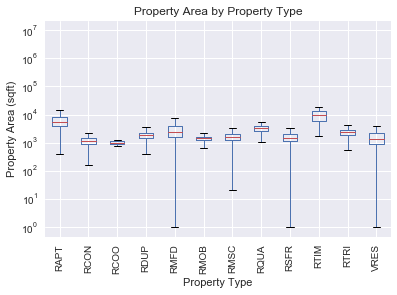

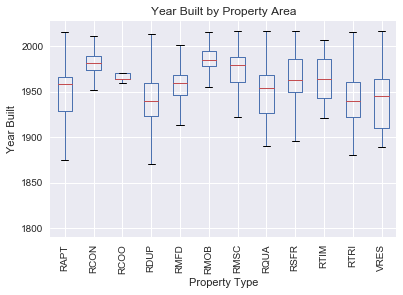

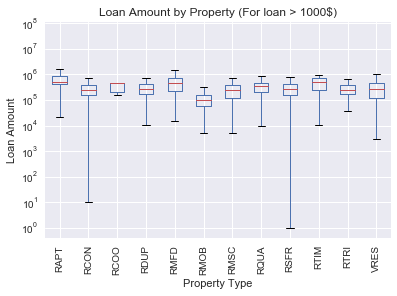

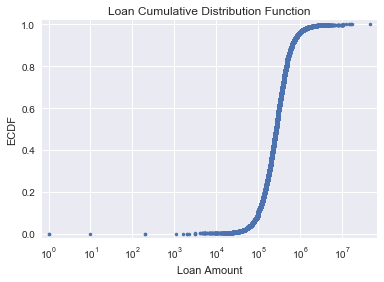

                loan_amount transaction_amount
                        sum                sum
property_type                                 
RAPT           7.493317e+08         3699986421
RCON           1.398446e+09         6076201871
RCOO           5.754200e+06            9369248
RDUP           4.921529e+08         1510902299
RMFD           4.747075e+08         1685002096
RMOB           3.465458e+07          198792278
RMSC           1.135328e+08          464514509
RQUA           1.715183e+08          514267246
RSFR           1.349036e+10        46490592081
RTIM           9.825920e+05            1640875
RTRI           9.824460e+07          331895727
VRES           3.248376e+08         2690296884


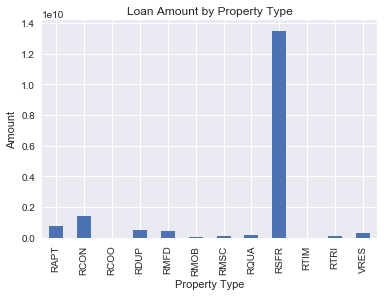

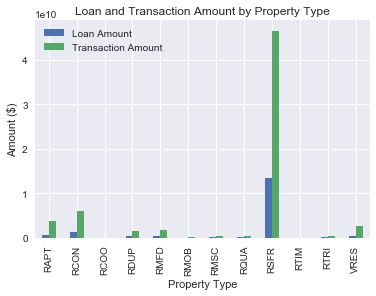

                loan_amount transaction_amount loan percent transaction percent
                        sum                sum                                 
property_type                                                                  
RAPT           7.493317e+08         3699986421     4.317788            5.810877
RCON           1.398446e+09         6076201871     8.058107            9.542754
RCOO           5.754200e+06            9369248     0.033157            0.014715
RDUP           4.921529e+08         1510902299     2.835876            2.372892
RMFD           4.747075e+08         1685002096     2.735352            2.646318
RMOB           3.465458e+07          198792278     0.199686            0.312206
RMSC           1.135328e+08          464514509     0.654197            0.729526
RQUA           1.715183e+08          514267246     0.988320            0.807663
RSFR           1.349036e+10        46490592081    77.733977           73.014080
RTIM           9.825920e+05            1

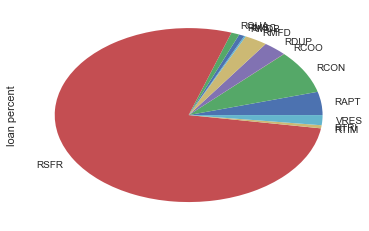

In [4]:
# Initial Data Wrangling

## In previous section we observed some columns which need some modifications

# Sort Data based on 'transaction_date' column 

df['transaction_date'] =  pd.to_datetime(df['transaction_date'], format='%Y/%m/%d')
df = df.sort_values('transaction_date')
df = df.reset_index(drop=True)

# Replace missing value with NaN

df['year_built'].replace(to_replace=0, value=np.NaN, inplace=True)
df['sqft'].replace(to_replace=0, value=np.NaN, inplace=True)
df['lender'].replace(to_replace='* Undisclosed', value=np.NaN, inplace=True)

# Add new column (Zip Code)

df['zip_code'] = df['property_address'].apply(lambda x: str(x).split()[-1][:5])

# Add new column (City)

df['city'] = ""

# Add new column (County)

df['county']=""

# Add new column (Region)

df['region']=""

#search = ZipcodeSearchEngine()
#df['city'] = df['zip_code'].apply(lambda x: search.by_zipcode(x)["City"])

# Re-Checking Clean Data

print (df.info())
print (df.head())
print (df.describe())

# Initial data exploration on all cleaned data 

df.boxplot(column = 'sqft' , by='property_type' , rot=90)
plt.xlabel('Property Type')
plt.ylabel('Property Area (sqft)')
plt.title('Property Area by Property Type')
plt.yscale("log")
plt.suptitle("")
plt.show()


df.boxplot(column = 'year_built' , by='property_type' , rot=90)
plt.xlabel('Property Type')
plt.ylabel('Year Built')
plt.title('Year Built by Property Area')
plt.suptitle("")
plt.show()

# For getting the better image of loans I filtered the loans = 1000 

df_loan_non_zero = df.loc[df['loan_amount'] > 0 , ] 
df_loan_non_zero.boxplot(column='loan_amount' , by='property_type' , rot=90)
plt.xlabel("Property Type")
plt.ylabel("Loan Amount")
plt.title("Loan Amount by Property (For loan > 1000$)")
plt.yscale("log")
plt.suptitle("")
plt.show()

# Empirical Cumulative Distribution Function on All Loans 

x = np.sort(df_loan_non_zero['loan_amount'])
y = np.arange(1, len(x)+1) /len(x) 
plt.plot(x , y, marker='.' , linestyle='none')
plt.xscale("log")
plt.ylabel('ECDF')
plt.xlabel('Loan Amount')
plt.margins(0.02)
plt.title('Loan Cumulative Distribution Function')
plt.show()

# Total Loan Amount and Transaction Amount by Property Type

df_group_prtype = df.groupby('property_type')['loan_amount','transaction_amount'].agg(['sum'])
print (df_group_prtype)

df_group_prtype['loan_amount']['sum'].plot(kind='bar')
plt.xlabel('Property Type')
plt.ylabel('Amount')
plt.title('Loan Amount by Property Type')
plt.show()


df_group_prtype.plot(y=["loan_amount", "transaction_amount"], kind="bar")
plt.xlabel('Property Type')
plt.ylabel('Amount ($)')
plt.title('Loan and Transaction Amount by Property Type')
plt.legend(['Loan Amount', 'Transaction Amount'])
plt.show()


df_group_prtype['loan percent'] = df_group_prtype['loan_amount']['sum'] * 100 / df_group_prtype['loan_amount']['sum'].sum()
df_group_prtype['transaction percent'] = df_group_prtype['transaction_amount']['sum'] * 100 / df_group_prtype['transaction_amount']['sum'].sum()
print (df_group_prtype)


df_group_prtype['loan percent'].plot(kind='pie')
plt.show()

        property_id  transaction_amount   loan_amount   year_built         sqft
count  7.720000e+02        7.720000e+02  7.720000e+02   758.000000   764.000000
mean   3.525544e+07        3.805686e+05  3.274051e+05  1961.225594  1587.281414
std    1.938015e+07        2.961087e+05  2.263729e+05    23.067428   664.584621
min    2.366863e+07        0.000000e+00  5.000000e+04  1888.000000   528.000000
25%    2.627697e+07        1.937500e+05  1.762000e+05  1950.000000  1142.000000
50%    2.933817e+07        3.080000e+05  2.782500e+05  1960.000000  1422.000000
75%    3.288429e+07        4.725568e+05  4.200000e+05  1977.000000  1804.000000
max    1.405366e+08        3.450182e+06  2.087700e+06  2016.000000  5211.000000


/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


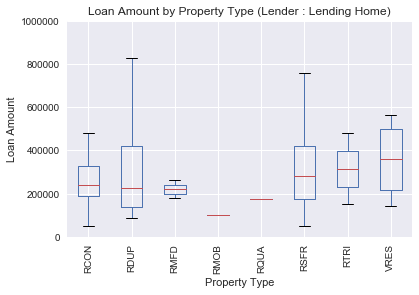

               loan_amount                      transaction_amount                      loan_amount(%) loan_count(%)
                       sum           mean count                sum           mean count                             
property_type                                                                                                       
RCON            14244700.0  309667.391304    46           16040600  348708.695652    46       5.958549      5.635735
RDUP             4127800.0  317523.076923    13            4769490  366883.846154    13       1.683938      1.633112
RMFD              442500.0  221250.000000     2             496000  248000.000000     2       0.259067      0.175070
RMOB              101000.0  101000.000000     1             100000  100000.000000     1       0.129534      0.039959
RQUA              175000.0  175000.000000     1             150000  150000.000000     1       0.129534      0.069237
RSFR           231610834.0  329460.645804   703          2696713

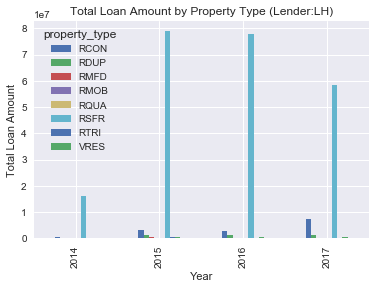

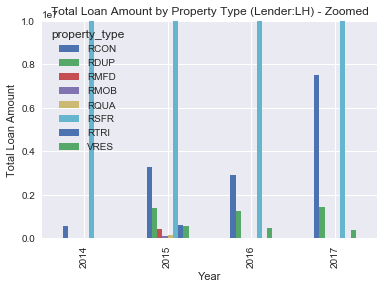

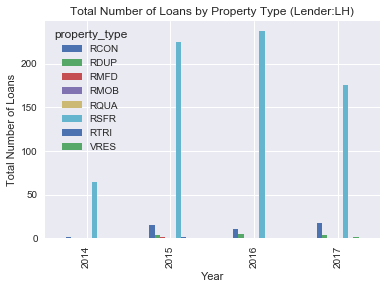

                                    count        sum
transaction_date property_type                      
2014             RCON            2.985075   3.353096
                 RSFR           97.014925  96.646904
2015             RCON            5.976096   3.836447
                 RDUP            1.593625   1.642404
                 RMFD            0.796813   0.517491
                 RMOB            0.398406   0.118116
                 RQUA            0.398406   0.204657
                 RSFR           89.641434  92.287110
                 RTRI            0.796813   0.735948
                 VRES            0.398406   0.657827
2016             RCON            4.330709   3.513310
                 RDUP            1.968504   1.549833
                 RSFR           93.307087  94.355912
                 VRES            0.393701   0.580945
2017             RCON            9.000000  11.045548
                 RDUP            2.000000   2.127769
                 RSFR           88.000000  86.

In [5]:
## Deep dive into "Lending Home" borrowers 

# Filter LendingHome as lender from whole dataset 

LH_bor = df[df['lender']== 'LendingHome']
print (LH_bor.describe())


# Initial exploration on LH borrowers 

LH_bor.boxplot(column=['loan_amount'], by=['property_type'] , rot = 90)
plt.title("Loan Amount by Property Type (Lender : Lending Home)")
plt.suptitle("")
plt.xlabel("Property Type")
plt.ylabel("Loan Amount")
plt.ylim([0,1000000])
plt.show()

# LH borrowers grouped by Property Type and check some features 

LH_bor_prtype = LH_bor.groupby('property_type')['loan_amount','transaction_amount'].agg(['sum','mean','count'])
LH_bor_prtype['loan_amount(%)'] = LH_bor_prtype ['loan_amount']['count'] * 100 / LH_bor_prtype ['loan_amount']['count'].sum()
LH_bor_prtype['loan_count(%)'] = LH_bor_prtype ['loan_amount']['sum'] * 100 / LH_bor_prtype ['loan_amount']['sum'].sum()
print (LH_bor_prtype)

# Check the Lending Home growth through time 

# Loans by Lending Home grouped by Time(year) and Property Type

LH_bor_prtype_year = LH_bor.groupby([df.transaction_date.dt.year, df.property_type])['loan_amount'].agg(['count','sum'])
print (LH_bor_prtype_year)

# Plot Lednging Home Loans (Amount)

LH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Property Type (Lender:LH)')
plt.show()

# Change "ylim" to zoom into the above chart to get better idea of other property types (all except:RSFR)

LH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Property Type (Lender:LH) - Zoomed')
plt.ylim(0,10000000)
plt.show()

# Plot Lending Home loans (Counts)

LH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='count' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Number of Loans')
plt.title('Total Number of Loans by Property Type (Lender:LH)')
plt.show()


# Lending Home borrowers (percent) based on property type in each year
LH_bor_prtype_year_percent = LH_bor_prtype_year.groupby(level=0).apply(lambda x:100 * x / (x.sum()))
print (LH_bor_prtype_year_percent)






        property_id  transaction_amount   loan_amount    year_built           sqft
count  4.841000e+04        4.841000e+04  4.841000e+04  46089.000000   46897.000000
mean   4.106424e+07        5.263316e+05  3.532694e+05   1964.375903    1960.090134
std    2.934825e+07        1.700070e+06  4.870800e+05     26.727539    3083.990960
min    2.349861e+07        0.000000e+00  1.000000e+00   1801.000000       1.000000
25%    2.705576e+07        1.940000e+05  1.610000e+05   1949.000000    1196.000000
50%    3.104727e+07        3.150000e+05  2.625000e+05   1962.000000    1552.000000
75%    3.834847e+07        5.200000e+05  4.160000e+05   1984.000000    2121.000000
max    1.846802e+08        1.500000e+08  4.649990e+07   2017.000000  191136.000000


/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/Users/rtmac/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


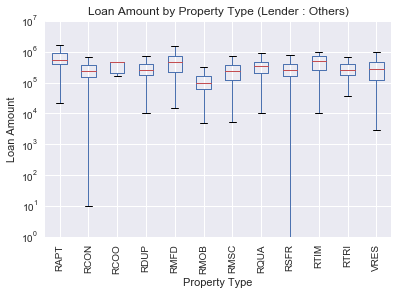

                loan_amount                       transaction_amount                      loan_amount(%)  \
                        sum           mean  count                sum          mean  count                  
property_type                                                                                              
RAPT           7.493317e+08  859325.365826    872         2761388703  3.166730e+06    872       1.801281   
RCON           1.384202e+09  307054.472493   4508         2247626995  4.985863e+05   4508       9.312126   
RCOO           5.754200e+06  383613.333333     15            6090500  4.060333e+05     15       0.030985   
RDUP           4.880251e+08  331764.207342   1471          643351492  4.373566e+05   1471       3.038628   
RMFD           4.742650e+08  672716.270922    705         1197406336  1.698449e+06    705       1.456311   
RMOB           3.455358e+07  121240.624561    285           40469400  1.419979e+05    285       0.588721   
RMSC           1.135328e+08 

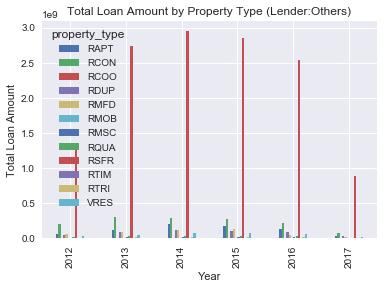

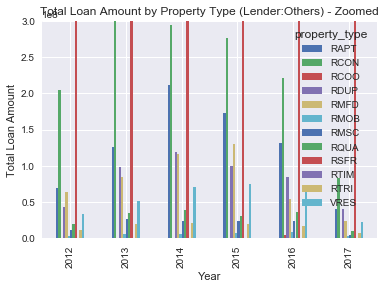

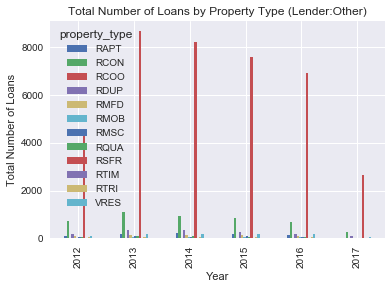

                                    count        sum
transaction_date property_type                      
2012             RAPT            1.624365   3.906372
                 RCON           12.013536  11.631722
                 RDUP            3.367174   2.496359
                 RMFD            2.030457   3.628288
                 RMOB            0.507614   0.172861
                 RMSC            0.829103   0.642042
                 RQUA            1.150592   1.138899
                 RSFR           75.617597  73.811099
                 RTRI            0.964467   0.686605
                 VRES            1.895093   1.885752
2013             RAPT            1.612165   3.603421
                 RCON            9.956948   8.726840
                 RDUP            3.334249   2.817717
                 RMFD            1.227443   2.444329
                 RMOB            0.458001   0.173013
                 RMSC            0.916003   0.750231
                 RQUA            1.007603   1.

In [6]:
# Other Lenders 

OTH_bor = df[df['lender'] != 'LendingHome']
OTH_bor_non_zero = OTH_bor[OTH_bor['loan_amount'] > 0]
print (OTH_bor_non_zero.describe())

pd.set_option('display.width', 115)

# Initial exploration on LH borrowers 

OTH_bor_non_zero.boxplot(column=['loan_amount'], by=['property_type'] , rot = 90)
plt.title("Loan Amount by Property Type (Lender : Others)")
plt.suptitle("")
plt.xlabel("Property Type")
plt.ylabel("Loan Amount")
plt.yscale('log')
plt.ylim([0,10000000])
plt.show()

# Others borrowers grouped by Property Type and check some features 

OTH_bor_prtype = OTH_bor_non_zero.groupby('property_type')['loan_amount','transaction_amount'].agg(['sum','mean','count'])
OTH_bor_prtype['loan_amount(%)'] = OTH_bor_prtype ['loan_amount']['count'] * 100 / OTH_bor_prtype ['loan_amount']['count'].sum()
OTH_bor_prtype['loan_count(%)'] = OTH_bor_prtype ['loan_amount']['sum'] * 100 / OTH_bor_prtype ['loan_amount']['sum'].sum()

print (OTH_bor_prtype)



# Check other lenders growth through time 

# Loans by other lenders grouped by Time(year) and Property Type

OTH_bor_prtype_year = OTH_bor_non_zero.groupby([df.transaction_date.dt.year, df.property_type])['loan_amount'].agg(['count','sum'])
print (OTH_bor_prtype_year)

# Plot Other Lenders Loans (Amount)

OTH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Property Type (Lender:Others)')
plt.show()

# Change "ylim" to zoom into the above chart to get better idea of other property types (all except:RSFR)

OTH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Property Type (Lender:Others) - Zoomed')
plt.ylim(0,300000000)
plt.show()

# Plot Other lenders loans (Counts)

OTH_bor_prtype_year.unstack(level=1).plot(kind='bar' , y='count' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Number of Loans')
plt.title('Total Number of Loans by Property Type (Lender:Other)')
plt.show()


# Othet lenders' borrowers (percent) based on property type in each year
OTH_bor_prtype_year_percent = OTH_bor_prtype_year.groupby(level=0).apply(lambda x:100 * x / (x.sum()))
print (OTH_bor_prtype_year_percent)





                                        sum  count          mean
transaction_date property_type                                  
2012             RAPT             242972086    222  1.094469e+06
                 RCON            1159344960   2715  4.270147e+05
                 RCOO                494500      4  1.236250e+05
                 RDUP             188303921    688  2.736976e+05
                 RMFD             243712718    254  9.594989e+05
                 RMOB              16398180    218  7.522101e+04
                 RMSC              59764440    207  2.887171e+05
                 RQUA              72392712    216  3.351514e+05
                 RSFR            5478881792  16963  3.229901e+05
                 RTRI              50610777    175  2.892044e+05
                 VRES             205541001    540  3.806315e+05
2013             RAPT             650747499    367  1.773154e+06
                 RCON            1409670624   4743  2.972108e+05
                 RCOO    

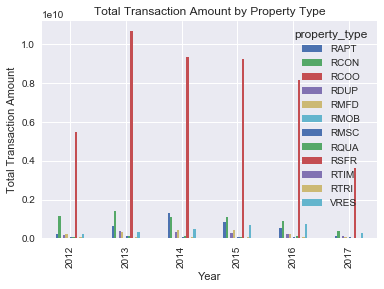

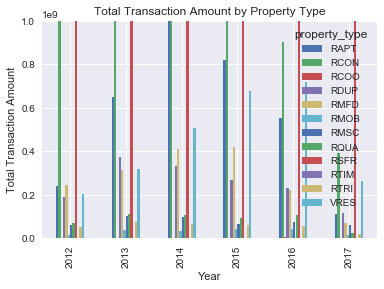

In [7]:
# Transaction Amount grouped by Property Type and Time 

trans_amount_prtype_year = df.groupby([df.transaction_date.dt.year , df.property_type])['transaction_amount'].agg(['sum','count','mean'])
print (trans_amount_prtype_year)

# plot transaction amount growth through time 
trans_amount_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Property Type')
plt.show()

# set ylim to zoomed in to the graph 
trans_amount_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amount by Property Type')
plt.ylim([0,1000000000])
plt.show()

                                   sum  count
lender                                       
Anchor                     899300912.0   2439
Wells Fargo                669295340.6   1394
Lone Oak                   358406300.0   1201
Chase                      325807265.0    444
5 Arch                     255800696.0    716
LendingHome                252756734.0    772
Genesis                    232168809.0    385
FIRST REPUBLIC BK          185743611.0    147
FIRST REPUBLIC BANK        169419297.0    178
CASON HM LNS               146737275.0    388
Pivotal                    127142850.0    390
Center Street              124816150.0    461
BANK OF AMERICA            113651682.0    211
UNION BANK                 110817264.0    159
CASCADE LAND HM FINANCING  109303279.0    313
MUFG UNION BK NA           103683472.0    141
FATHER KRAMER CU            95967891.0    274
Iron Bridge                 93794800.0    204
ARCHETYPE CREDIT OPPORTUN   82027600.0    124
REHABBERS FINANCIAL INC     767441

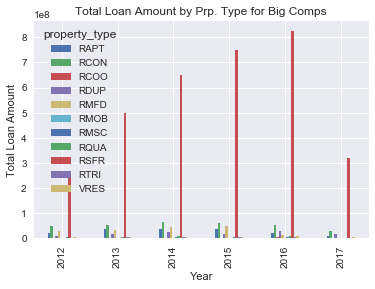

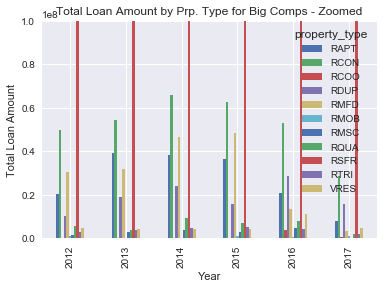

                                Loan Percent
transaction_date property_type              
2012             RAPT               5.302108
                 RCON              12.812130
                 RDUP               2.648978
                 RMFD               7.840845
                 RMOB               0.245815
                 RMSC               0.428328
                 RQUA               1.441314
                 RSFR              67.379644
                 RTRI               0.710920
                 VRES               1.189917
2013             RAPT               5.959671
                 RCON               8.312654
                 RDUP               2.894351
                 RMFD               4.836096
                 RMOB               0.012270
                 RMSC               0.447747
                 RQUA               0.602892
                 RSFR              75.683150
                 RTRI               0.592247
                 VRES               0.658921
2014      

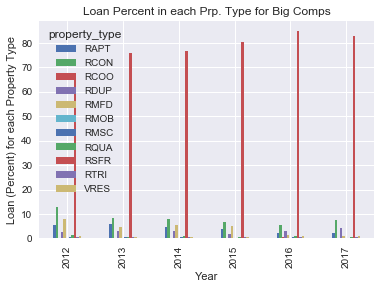

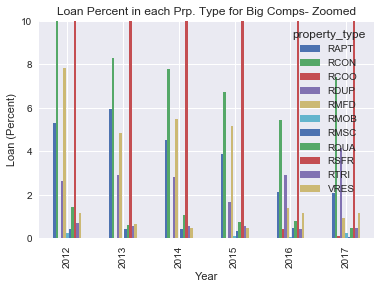

In [8]:
# Big competitors in Lending Industry 

# All lenders grouped by loans (sum and count)

all_busin_names = df.groupby('lender')['loan_amount'].agg(['sum','count'])

# Sort lenders for finding the biggest ones 

sorted_all_busin = all_busin_names.sort_values(by='sum' , ascending = False ).drop('* OTHER INSTITUTIONAL LEN')
print (sorted_all_busin)

# Filter the ones with loan amounts > 10e8 and put them in a list 

big_busin = all_busin_names[all_busin_names['sum'] > 100000000].sort_values(by='sum' , ascending = False).drop('* OTHER INSTITUTIONAL LEN')
big_busin_names = list(big_busin.index.values)
print (big_busin_names)

# Extract the observations related to the big business 

df_big_busin = df[df['lender'].isin(big_busin_names)]
print (df_big_busin.head(15))

# Group big business by property type 

df_big_busin_prtype_year = df_big_busin.groupby([df_big_busin.transaction_date.dt.year , df_big_busin.property_type])['loan_amount'].agg(['sum'])
print (df_big_busin_prtype_year)

# Visulaization 

df_big_busin_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Prp. Type for Big Comps')
plt.show()

# Zoomed in plot 
df_big_busin_prtype_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Prp. Type for Big Comps - Zoomed')
plt.ylim([0,100000000])
plt.show()

# Getting the loan percent for each property type 
df_big_busin_prtype_year_percent = df_big_busin_prtype_year.groupby(level=0).apply(lambda x:100 * x / (x.sum()))
df_big_busin_prtype_year_percent.columns = ['Loan Percent']
print (df_big_busin_prtype_year_percent)

df_big_busin_prtype_year_percent.unstack(level=1).plot(kind='bar' , y='Loan Percent' , subplots= False)
plt.xlabel('Year')
plt.ylabel('Loan (Percent) for each Property Type')
plt.title('Loan Percent in each Prp. Type for Big Comps')
plt.show()

# Zoomed in plot
df_big_busin_prtype_year_percent.unstack(level=1).plot(kind='bar' , y='Loan Percent' , subplots= False)
plt.xlabel('Year')
plt.ylabel('Loan (Percent)')
plt.title('Loan Percent in each Prp. Type for Big Comps- Zoomed')
plt.ylim([0,10])
plt.show()

In [9]:
## Lending Home Customers 

LH_bor_zip_counts = LH_bor['zip_code'].value_counts()
print (LH_bor_zip_counts.head())

# Change some zip codes to others 

LH_bor['zip_code'].replace(to_replace='93888', value='93727', inplace=True)
LH_bor['zip_code'].replace(to_replace='94973', value='94930', inplace=True)
LH_bor['zip_code'].replace(to_replace='92522', value='92506', inplace=True)
LH_bor['zip_code'].replace(to_replace='93199', value='93117', inplace=True)
LH_bor['zip_code'].replace(to_replace='95196', value='95113', inplace=True)
LH_bor['zip_code'].replace(to_replace='93258', value='93257', inplace=True)
LH_bor['zip_code'].replace(to_replace='95397', value='95354', inplace=True)
LH_bor['zip_code'].replace(to_replace='93921', value='93923', inplace=True)
LH_bor['zip_code'].replace(to_replace='91618', value='91601', inplace=True)
LH_bor['zip_code'].replace(to_replace='91793', value='91790', inplace=True)
LH_bor['zip_code'].replace(to_replace='93061', value='93060', inplace=True)
LH_bor['zip_code'].replace(to_replace='95297', value='95202', inplace=True)
LH_bor['zip_code'].replace(to_replace='92382', value='92346', inplace=True)

# Find city based on zipcode for LH

search = ZipcodeSearchEngine()
LH_bor['city'] = LH_bor['zip_code'].apply(lambda x: search.by_zipcode(x)["City"])
print (LH_bor.loc[:,['city','zip_code']])

LH_bor['city'].replace(to_replace='None', value=np.NaN, inplace=True)


LH_bor.info()

# Find city based on zip code for ALL 
#df_small = df.iloc[:20]
#df_small['city'] = df['zip_code'].apply(lambda x:search.by_zipcode(x)["City"])
#df_small['city'].replace(to_replace='None', value=np.Nan, inplace=True)


#print (df_small.head(20))

93888    10
92115     8
91001     7
nan       6
95628     6
Name: zip_code, dtype: int64


/Users/rtmac/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


                  city zip_code
72289        San Diego    92115
74651          Fairfax    94930
75109        Riverside    92506
75856      Los Angeles    90059
76580         Beaumont    92223
77018          Anaheim    92808
77277        San Diego    92110
77375         Highland    92346
77890        San Diego    92115
77915          La Mesa    91942
78439         Richmond    94801
78489          Yucaipa    92399
78591        Riverside    92506
78688       Costa Mesa    92626
78698          Yucaipa    92399
78933        San Diego    92115
79478           Colton    92324
79556           Rialto    92377
81788   San Bernardino    92407
81821          Salinas    93906
81958      Pine Valley    91962
82139         El Cajon    92019
83012            Vista    92083
83062        San Diego    92122
83105       Foresthill    95631
83218   San Bernardino    92405
83769       Carmichael    95608
84447         Berkeley    94702
84960   South El Monte    91733
85526         Richmond    94801
...     

/Users/rtmac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
#print (LH_bor.iloc[700:760,11:13])
#print (LH_bor.loc[LH_bor['zip_code']=='93727',:])

# Find the counties based on the city (All CA counties(43) which population > 50000 in 2017)


def countyfunc(x): 
    if x in ['Alpine','Bonita','Bonsall','Borrego Springs','Boulevard','Camp Pendleton','Campo','Cardiff By The Sea','Carlsbad','Chula Vista','Coronado','Del Mar','Descanso','Dulzura','El Cajon','Encinitas','Escondido','Fallbrook','Guatay','Imperial Beach','Jacumba','Jamul','Julian','La Jolla','La Mesa','Lakeside','Lemon Grove','Mount Laguna','National City','Oceanside','Pala','Palomar Mountain','Pauma Valley','Pine Valley','Potrero','Poway','Ramona','Ranchita','Rancho Santa Fe','San Diego','San Luis Rey','San Marcos','San Ysidro','Santa Ysabel','Santee','Solana Beach','Spring Valley','Tecate','Valley Center','Vista','Warner Springs']:
        return 'San Diego'
    elif x in ['Acton', 'Agoura Hills','Alhambra','Altadena','Arcadia','Artesia','Avalon','Azusa','Baldwin Park','Bellflower','Bell Gardens','Beverly Hills','Burbank','Calabasas','Canoga Park','Canyon Country','Carson','Castaic','Cerritos','Chatsworth','Claremont','Compton','Covina','Culver City','Diamond Bar','Downey','Duarte','El Monte','El Segundo','Encino','Gardena','Glendale','Glendora','Granada Hills','Hacienda Heights','Harbor City','Hawaiian Gardens','Hawthorne','Hermosa Beach','Huntington Park','Inglewood','La Canada Flintridge','La Crescenta','La Mirada','La Puente','La Verne','Lake Hughes','Lakewood','Lancaster','Lawndale','Littlerock','Llano','Lomita','Long Beach','Los Angeles','Lynwood','Malibu','Manhattan Beach','Marina Del Rey','Maywood','Mission Hills','Monrovia','Montebello','Monterey Park','Montrose','Mount Wilson','Newhall','North Hills','North Hollywood','Northridge','Norwalk','Pacific Palisades','Pacoima','Palmdale','Palos Verdes Peninsula','Panorama City','Paramount','Pasadena','Pearblossom','Pico Rivera','Playa Del Rey','Playa Vista','Pomona','Porter Ranch','Rancho Palos Verdes','Redondo Beach','Reseda','Rosemead','Rowland Heights','San Dimas','San Fernando','San Gabriel','San Marino','San Pedro','Santa Clarita','Santa Fe Springs','Santa Monica','Sherman Oaks','Sierra Madre','Signal Hill','South El Monte','South Gate','South Pasadena','Stevenson Ranch','Studio City','Sun Valley','Sunland','Sylmar','Tarzana','Temple City','Topanga','Torrance','Tujunga','Valencia','Valley Village','Valyermo','Van Nuys','Venice','Verdugo City','Walnut','West Covina','West Hills','West Hollywood','Whittier','Wilmington','Winnetka','Woodland Hills']:
        return 'Los Angeles'
    elif x in ['Aliso Viejo','Anaheim','Brea','Buena Park','Capistrano Beach','Corona Del Mar','Costa Mesa','Cypress','Dana Point','Foothill Ranch','Fountain Valley','Fullerton','Garden Grove','Huntington Beach','Irvine','La Habra','La Palma','Ladera Ranch','Laguna Beach','Laguna Hills','Laguna Niguel','Laguna Woods','Lake Forest','Los Alamitos','Midway City','Mission Viejo','Newport Beach','Newport Coast','Orange','Placentia','Rancho Santa Margarita','San Clemente','San Juan Capistrano','Santa Ana','Seal Beach','Silverado','Stanton','Sunset Beach','Surfside','Trabuco Canyon','Tustin','Villa Park','Westminster','Yorba Linda']:
        return 'Orange'
    elif x in ['Antelope','Carmichael','Citrus Heights','Courtland','Elk Grove','Elverta','Fair Oaks','Folsom','Galt','Herald','Hood','Isleton','Mather','Mcclellan','North Highlands','Orangevale','Rancho Cordova','Rio Linda','Ryde','Sacramento','Sloughhouse','Walnut Grove','Wilton']:
        return 'Sacramento'
    elif x in ['Adelanto','Amboy','Angelus Oaks','Apple Valley','Baker','Barstow','Big Bear City','Big Bear Lake','Bloomington','Blue Jay','Bryn Mawr','Cedar Glen','Cedarpines Park','Chino','Chino Hills','Cima','Colton','Crestline','Daggett','Earp','Essex','Fawnskin','Fontana','Forest Falls','Fort Irwin','Grand Terrace','Green Valley Lake','Guasti','Helendale','Hesperia','Highland','Hinkley','Joshua Tree','Lake Arrowhead','Landers','Loma Linda','Lucerne Valley','Ludlow','Lytle Creek','Mentone','Montclair','Morongo Valley','Mountain Pass','Mt Baldy','Needles','Newberry Springs','Nipton','Ontario','Oro Grande','Parker Dam','Phelan','Pinon Hills','Pioneertown','Rancho Cucamonga','Redlands','Rialto','Rimforest','Running Springs','San Bernardino','Skyforest','Sugarloaf','Trona','Twentynine Palms','Twin Peaks','Upland','Victorville','Vidal','Wrightwood','Yermo','Yucaipa','Yucca Valley']:
        return 'San Bernardino'
    elif x in ['Auberry','Big Creek','Biola','Burrel','Cantua Creek','Caruthers','Clovis','Coalinga','Del Rey','Dunlap','Firebaugh','Five Points','Fowler','Fresno','Friant','Helm','Hume','Huron','Kerman','Kingsburg','Lakeshore','Laton','Mendota','Miramonte','Mono Hot Springs','Orange Cove','Parlier','Piedra','Prather','Raisin City','Reedley','Riverdale','San Joaquin','Sanger','Selma','Shaver Lake','Squaw Valley','Tollhouse','Tranquillity']:
        return 'Frenso'
    elif x in ['Alviso','Campbell','Coyote','Cupertino','Gilroy','Holy City','Los Altos','Los Gatos','Milpitas','Morgan Hill','Mount Hamilton','Mountain View','Palo Alto','Redwood Estates','San Jose','San Martin','Santa Clara','Saratoga','Stanford','Sunnyvale']:
        return 'Santa Clara'
    elif x in ['Alameda','Albany','Berkeley','Castro Valley','Dublin','Emeryville','Fremont','Hayward','Livermore','Newark','Oakland','Pleasanton','San Leandro','San Lorenzo','Sunol','Union City']:
        return 'Alameda'
    elif x in ['Alamo','Antioch','Bethel Island','Brentwood','Byron','Canyon','Clayton','Concord','Crockett','Danville','Diablo','Discovery Bay','El Cerrito','El Sobrante','Hercules','Knightsen','Lafayette','Martinez','Moraga','Oakley','Orinda','Pinole','Pittsburg','Pleasant Hill','Port Costa','Richmond','Rodeo','San Pablo','San Ramon','Walnut Creek']:
        return 'Contra Costa'
    elif x in ['Aguanga','Anza','Banning','Beaumont','Blythe','Cabazon','Calimesa','Cathedral City','Coachella','Corona','Desert Center','Desert Hot Springs','Hemet','Homeland','Idyllwild','Indian Wells','Indio','La Quinta','Lake Elsinore','Mecca','Menifee','Mira Loma','Moreno Valley','Mountain Center','Murrieta','Norco','North Palm Springs','Nuevo','Palm Desert','Palm Springs','Perris','Quail Valley','Rancho Mirage','Riverside','San Jacinto','Sun City','Temecula','Thermal','Thousand Palms','Whitewater','Wildomar','Winchester']:
        return 'Riverside'
    elif x in ['American Canyon','Angwin','Calistoga','Deer Park','Napa','Oakville','Pope Valley','Rutherford','Saint Helena','Yountville']:
        return 'Napa'
    elif x in ['Acampo','Clements','Escalon','Farmington','French Camp','Holt','Lathrop','Linden','Lockeford','Lodi','Manteca','Ripon','Stockton','Thornton','Tracy','Vernalis','Victor','Woodbridge']:
        return 'San Joaquin'
    elif x in ['Arvin','Bakersfield','Bodfish','Boron','Buttonwillow','Caliente','California City','Cantil','Delano','Edison','Edwards','Fellows','Frazier Park','Glennville','Inyokern','Johannesburg','Keene','Kernville','Lake Isabella','Lamont','Lebec','Lost Hills','Maricopa','Mc Farland','Mc Kittrick','Mojave','Onyx','Pine Mountain Club','Randsburg','Red Mountain','Ridgecrest','Rosamond','Shafter','Taft','Tehachapi','Tupman','Wasco','Weldon','Wofford Heights','Woody']:
        return 'Kern'
    elif x in ['Buellton','Carpinteria','Casmalia','Goleta','Guadalupe','Lompoc','Los Alamos','Los Olivos','New Cuyama','Santa Barbara','Santa Maria','Santa Ynez','Solvang','Summerland']:
        return 'Santa Barbara'
    elif x in ['Aromas','Big Sur','Bradley','Carmel','Carmel By The Sea','Carmel Valley','Castroville','Chualar','Gonzales','Greenfield','Jolon','King City','Lockwood','Marina','Monterey','Moss Landing','Pacific Grove','Pebble Beach','Salinas','San Ardo','San Lucas','Seaside','Soledad','Spreckels']:
        return 'Monterey'
    elif x in ['Atherton','Belmont','Brisbane','Burlingame','Daly City','El Granada','Half Moon Bay','La Honda','Loma Mar','Menlo Park','Millbrae','Montara','Moss Beach','Pacifica','Pescadero','Portola Valley','Redwood City','San Bruno','San Carlos','San Francisco','San Gregorio','San Mateo','South San Francisco']:
        return 'San Mateo'
    elif x in ['Camarillo','Fillmore','Moorpark','Newbury Park','Oak Park','Oak View','Ojai','Oxnard','Piru','Port Hueneme','Santa Paula','Simi Valley','Somis','Thousand Oaks','Ventura','Westlake Village']:
        return 'Ventura'
    elif x in ['Aptos','Ben Lomond','Boulder Creek','Brookdale','Capitola','Davenport','Felton','Freedom','Los Gatos','Mount Hermon','Santa Cruz','Scotts Valley','Soquel','Watsonville']:
        return 'Santa Cruz'
    elif x in ['Benicia','Birds Landing','Dixon','Elmira','Fairfield','Rio Vista','Suisun City','Travis Afb','Vacaville','Vallejo']:
        return 'Solano'
    elif x in ['Ceres','Crows Landing','Denair','Empire','Hickman','Hughson','Keyes','La Grange','Modesto','Newman','Oakdale','Patterson','Riverbank','Salida','Turlock','Waterford','Westley']:
        return 'Stanislaus'
    elif x in ['Brooks','Capay','Clarksburg','Davis','Dunnigan','Esparto','Guinda','Knights Landing','Madison','Rumsey','West Sacramento','Winters','Woodland','Yolo','Zamora']:
        return 'Yolo'
    elif x in ['Cedar Ridge','Chicago Park','Floriston','Grass Valley','Nevada City','Norden','North San Juan','Penn Valley','Rough And Ready','Smartsville','Soda Springs','Truckee','Washington']:
        return 'Nevada'
    elif x in ['Annapolis','Bodega','Bodega Bay','Boyes Hot Springs','Camp Meeker','Cazadero','Cloverdale','Cotati','Duncans Mills','El Verano','Eldridge','Forestville','Fulton','Geyserville','Glen Ellen','Graton','Guerneville','Healdsburg','Jenner','Kenwood','Monte Rio','Occidental','Penngrove','Petaluma','Rio Nido','Rohnert Park','Santa Rosa','Sebastopol','Sonoma','Stewarts Point','The Sea Ranch','Valley Ford','Villa Grande','Vineburg','Windsor']:
        return 'Sonoma'
    elif x in ['Arroyo Grande','Atascadero','Avila Beach','Cambria','Cayucos','Creston','Grover Beach','Harmony','Los Osos','Morro Bay','Nipomo','Oceano','Paso Robles','Pismo Beach','San Luis Obispo','San Miguel','San Simeon','Santa Margarita','Shandon','Templeton']:
        return 'San Luis Obispo'
    elif x in ['Armona','Avenal','Corcoran','Hanford','Kettleman City','Lemoore','Stratford']:
        return 'Kings'
    elif x in ['Bard','Brawley','Calexico','Calipatria','El Centro','Heber','Holtville','Imperial','Niland','Ocotillo','Palo Verde','Salton City','Seeley','Westmorland','Winterhaven']:
        return 'Imperial'
    elif x in ['Alpaugh','Badger','California Hot Springs','Camp Nelson','Cutler','Dinuba','Ducor','Earlimart','Exeter','Farmersville','Goshen','Ivanhoe','Kaweah','Kings Canyon National Park','Lemon Cove','Lindsay','Orosi','Pixley','Porterville','Posey','Richgrove','Sequoia National Park','Springville','Strathmore','Sultana','Terra Bella','Three Rivers','Tipton','Traver','Tulare','Visalia','Waukena','Woodlake','Yettem']:
        return 'Tulare'
    elif x in ['Atwater','Ballico','Cressey','Delhi','Dos Palos','El Nido','Gustine','Hilmar','Le Grand','Livingston','Los Banos','Merced','Planada','Santa Rita Park','Snelling','South Dos Palos','Stevinson','Winton']:
        return 'Merced'
    elif x in ['Bangor','Berry Creek','Biggs','Chico','Clipper Mills','Durham','Feather Falls','Forbestown','Forest Ranch','Gridley','Magalia','Nelson','Oroville','Palermo','Paradise','Richvale','Stirling City']:
        return 'Butte'
    elif x in ['Anderson','Bella Vista','Big Bend','Burney','Cassel','Castella','Cottonwood','Fall River Mills','French Gulch','Hat Creek','Igo','Lakehead','Mcarthur','Millville','Montgomery Creek','Oak Run','Obrien','Old Station','Palo Cedro','Platina','Redding','Round Mountain','Shasta','Shasta Lake','Shingletown','Whiskeytown','Whitmore']:
        return 'Shasta'
    elif x in ['Alta','Applegate','Auburn','Carnelian Bay','Colfax','Dutch Flat','Emigrant Gap','Foresthill','Gold Run','Granite Bay','Homewood','Kings Beach','Lincoln','Loomis','Meadow Vista','Newcastle','Olympic Valley','Penryn','Rocklin','Roseville','Sheridan','Tahoe City','Tahoe Vista','Weimar']:
        return 'Placer'
    elif x in ['Belvedere Tiburon','Bolinas','Corte Madera','Dillon Beach','Fairfax','Forest Knolls','Greenbrae','Inverness','Lagunitas','Larkspur','Marshall','Mill Valley','Nicasio','Novato','Olema','Point Reyes Station','Ross','San Anselmo','San Geronimo','San Quentin','San Rafael','Sausalito','Stinson Beach','Tomales','Woodacre']:
        return 'Marin'
    elif x in ['Amador City','Drytown','Fiddletown','Ione','Jackson','Kit Carson','Martell','Pine Grove','Pioneer','Plymouth','River Pines','Sutter Creek','Volcano']:
        return 'Amador'
    elif x in ['Camino','Coloma','Cool','Diamond Springs','Echo Lake','El Dorado','El Dorado Hills','Garden Valley','Georgetown','Greenwood','Grizzly Flats','Kyburz','Lotus','Mount Aukum','Pilot Hill','Placerville','Pollock Pines','Rescue','Shingle Springs','Somerset','South Lake Tahoe','Tahoma','Twin Bridges']:
        return 'El Dorado'
    elif x in ['Clearlake','Clearlake Oaks','Clearlake Park','Cobb','Finley','Glenhaven','Hidden Valley Lake','Kelseyville','Lakeport','Lower Lake','Lucerne','Middletown','Nice','Upper Lake','Witter Springs']:
        return 'Lake'
    elif x in ['Albion','Boonville','Branscomb','Calpella','Caspar','Comptche','Covelo','Dos Rios','Elk','Fort Bragg','Gualala','Hopland','Laytonville','Leggett','Little River','Manchester','Mendocino','Navarro','Philo','Piercy','Point Arena','Potter Valley','Redwood Valley','Talmage','Ukiah','Westport','Willits','Yorkville']:
        return 'Mendocino'
    elif x in ['Corning','Flournoy','Gerber','Los Molinos','Manton','Mill Creek','Mineral','Paskenta','Paynes Creek','Proberta','Red Bluff','Tehama','Vina']:
        return 'Tehama'
    elif x in ['Live Oak','Meridian','Nicolaus','Pleasant Grove','Rio Oso','Robbins','Sutter','Yuba City']:
        return 'Sutter'
    elif x in ['Browns Valley','Brownsville','Camptonville','Challenge','Dobbins','Marysville','Olivehurst','Oregon House','Rackerby','Strawberry Valley','Wheatland']:
        return 'Yuba'
    elif x in ['Ahwahnee','Bass Lake','Chowchilla','Coarsegold','Madera','North Fork','O Neals','Oakhurst','Raymond','Wishon']:
        return 'Madera'
    elif x in ['Hollister','Paicines','San Juan Bautista','Tres Pinos']:
        return 'San Benito'
    elif x in ['Big Oak Flat','Chinese Camp','Columbia','Groveland','Jamestown','Long Barn','Mi Wuk Village','Moccasin','Pinecrest','Sonora','Soulsbyville','Standard','Strawberry','Tuolumne','Twain Harte']:
        return 'Tuolumne'
    elif x in ['Alderpoint','Arcata','Bayside','Blocksburg','Blue Lake','Bridgeville','Carlotta','Eureka','Ferndale','Fields Landing','Fortuna','Garberville','Honeydew','Hoopa','Hydesville','Kneeland','Korbel','Loleta','Mckinleyville','Miranda','Myers Flat','Orick','Orleans','Petrolia','Phillipsville','Redcrest','Redway','Rio Dell','Samoa','Scotia','Trinidad','Weott','Whitethorn','Willow Creek']:
        return 'Humboldt'
    else:  
        return 'None'

    
# Add Countys to LH subset     

#df['county'] = df['city'].apply(lambda x:countyfunc(x))
LH_bor['county'] = LH_bor['city'].apply(lambda x: countyfunc(x))


# Find the region based on the counties 

def regionfunc (x):
    if x in ['Alameda', 'Santa Clara' , 'Contra Costa' , 'San Mateo' , 'Napa', 'Solano','Marin','Santa Cruz','Sonoma']:
        return 'Bay Area'
    elif x in ['Monterey','San Luis Obispo','Santa Barbara','San Benito']:
        return 'Central Coast'
    elif x in ['Yolo','Sacramento','Sutter','Yuba','El Dorado','Placer']:
        return 'Greater Sacramento'
    elif x in ['San Joaquin', 'Frenso','Madera','Merced','Kern','Stanislaus','Tulare','Kings']:
        return 'Central Valley'
    elif x in ['Los Angeles','Ventura','Orange','San Bernardino', 'Riverside']:
        return 'Southern California'
    elif x in ['Amador','Tuolumne']:
        return 'Central Sierra'
    elif x in ['San Diego','Imperial']:
        return 'Southern Border'
    elif x in ['Shasta','Lake','Butte','Tehama','Humboldt','Mendocino']:
        return 'Northern California'
    else : 
        return 'None'

# Add Regions to LH subset

#df['region'] = df['county'].apply(lambda x:regionfunc(x))
LH_bor['region'] = LH_bor['county'].apply(lambda x: regionfunc(x))

/Users/rtmac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rtmac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
## Some initial exploration on LH customers based on the zipcode/ city/ region 

# Count the most_common zip codes 

LH_bor_zip_counts = LH_bor['zip_code'].value_counts()
print (LH_bor_zip_counts.head(10))

# Count the most_common cities 

LH_bor_city_counts = LH_bor['city'].value_counts()
print (LH_bor_city_counts.head(15))

#print (LH_bor.iloc[650:700,11:14])

# Count the most_common counties

LH_bor_county_counts = LH_bor['county'].value_counts()
print (LH_bor_county_counts.head(15))

#LH_bor_county_counts_sd = (LH_bor['county']=='San Diego').sum()
#print (LH_bor_county_counts_sd)


# Count the most_common regions

LH_bor_region_counts = LH_bor['region'].value_counts()
print (LH_bor_region_counts.head(8))

93727    11
92115     8
91001     7
95628     6
91977     6
95621     6
92506     6
92020     6
nan       6
92119     6
Name: zip_code, dtype: int64
San Diego         62
Sacramento        44
Los Angeles       40
Fresno            29
San Jose          17
Stockton          13
Riverside         12
San Bernardino    11
El Cajon          11
Oakland           10
Chula Vista       10
Escondido         10
Citrus Heights     9
Bakersfield        9
Altadena           7
Name: city, dtype: int64
San Diego         151
Los Angeles       149
Sacramento         81
Riverside          48
San Bernardino     46
Frenso             40
Contra Costa       30
Orange             30
Alameda            28
Santa Clara        20
Ventura            19
San Joaquin        15
San Mateo          13
Solano             11
Kern               10
Name: county, dtype: int64
Southern California    292
Southern Border        153
Bay Area               115
Greater Sacramento      94
Central Valley          84
Northern California

                             sum  count           mean
region                                                
Bay Area              52232850.0    115  454198.695652
Central Coast          5604500.0     12  467041.666667
Central Sierra           50000.0      1   50000.000000
Central Valley        10876931.0     84  129487.273810
Greater Sacramento    18946400.0     94  201557.446809
None                   1646200.0      8  205775.000000
Northern California    1620900.0     13  124684.615385
Southern Border       59652117.0    153  389883.117647
Southern California  102126836.0    292  349749.438356
                             sum  count           mean  loan amount percent  loan num percent
region                                                                                       
Bay Area              52232850.0    115  454198.695652            20.665265         14.896373
Central Coast          5604500.0     12  467041.666667             2.217349          1.554404
Central Sierra     

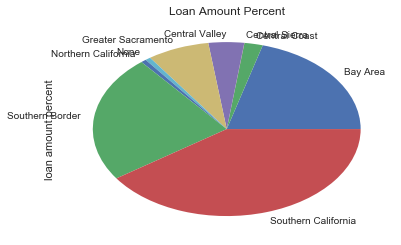

                             sum  count           mean  loan amount percent  loan num percent
region                                                                                       
Southern California  102126836.0    292  349749.438356            40.405189         37.823834
Southern Border       59652117.0    153  389883.117647            23.600604         19.818653
Bay Area              52232850.0    115  454198.695652            20.665265         14.896373
Greater Sacramento    18946400.0     94  201557.446809             7.495903         12.176166
Central Valley        10876931.0     84  129487.273810             4.303320         10.880829
Central Coast          5604500.0     12  467041.666667             2.217349          1.554404
None                   1646200.0      8  205775.000000             0.651298          1.036269
Northern California    1620900.0     13  124684.615385             0.641289          1.683938
Central Sierra           50000.0      1   50000.000000      

/Users/rtmac/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


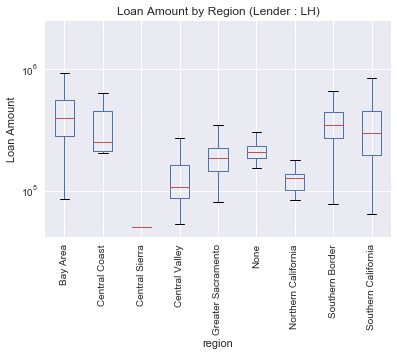

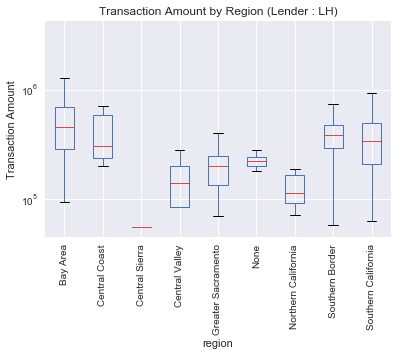

                                      count         sum           mean
transaction_date region                                               
2014             Bay Area                 5   1579800.0  315960.000000
                 Central Coast            2    429800.0  214900.000000
                 Central Valley          11   1046900.0   95172.727273
                 Greater Sacramento       5    768500.0  153700.000000
                 Southern Border         14   4808300.0  343450.000000
                 Southern California     30   8216800.0  273893.333333
2015             Bay Area                46  21057300.0  457767.391304
                 Central Coast            4   3103100.0  775775.000000
                 Central Sierra           1     50000.0   50000.000000
                 Central Valley          28   3464400.0  123728.571429
                 Greater Sacramento      25   5995800.0  239832.000000
                 Northern California      4    460000.0  115000.000000
      

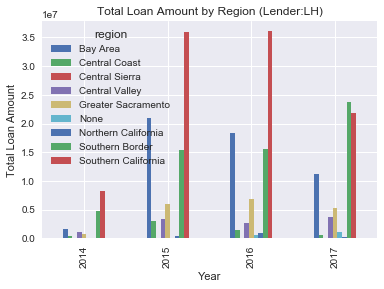

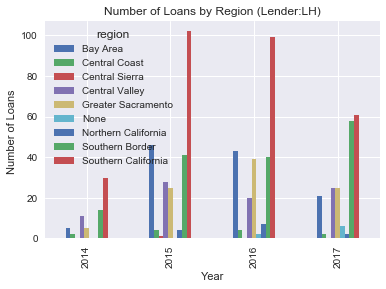

                                      count         sum          mean
transaction_date region                                              
1                Bay Area                 7   4032900.0  5.761286e+05
                 Central Coast            1    205000.0  2.050000e+05
                 Central Valley           3    302100.0  1.007000e+05
                 Greater Sacramento       4    736300.0  1.840750e+05
                 None                     2    302700.0  1.513500e+05
                 Southern Border          7   2361000.0  3.372857e+05
                 Southern California     24  10166200.0  4.235917e+05
2                Bay Area                 6   2793100.0  4.655167e+05
                 Central Coast            3   1100400.0  3.668000e+05
                 Central Valley           4    627800.0  1.569500e+05
                 Greater Sacramento       7   1479500.0  2.113571e+05
                 None                     2    367400.0  1.837000e+05
                 Nor

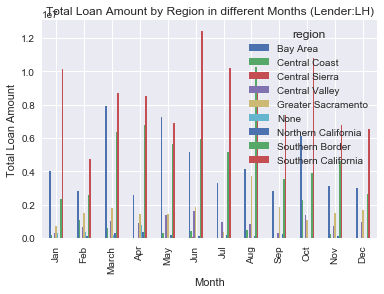

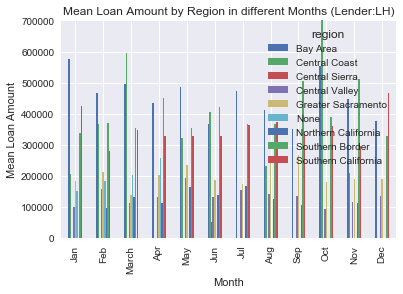

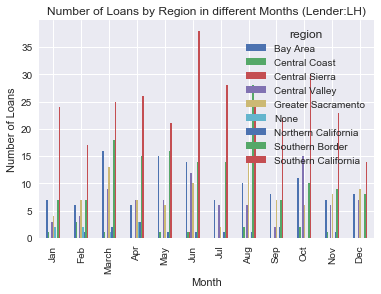

In [12]:
# Look into "REGIONS" 

LH_bor_region = LH_bor.groupby('region')['loan_amount'].agg(['sum','count','mean'])
print (LH_bor_region)

LH_bor_region['loan amount percent'] = LH_bor_region['sum'] * 100 / LH_bor_region['sum'].sum()
LH_bor_region['loan num percent'] = LH_bor_region['count'] * 100 /LH_bor_region['count'].sum()
print (LH_bor_region)


# Visual through regions 


LH_bor_region['loan amount percent'].plot(kind='pie' , title = 'Loan Amount Percent')
plt.suptitle("")
plt.show()



LH_bor_region_sorted = LH_bor_region.sort_values('loan amount percent' ,  ascending=False)
print (LH_bor_region_sorted)

# Box plot of regions loan amount 

LH_bor.boxplot(column=['loan_amount'], by=['region'] , rot = 90)
plt.title("Loan Amount by Region (Lender : LH)")
plt.suptitle("")
plt.xlabel("region")
plt.ylabel("Loan Amount")
plt.yscale('log')
#plt.ylim([0,10000000])
plt.show()

# Box plot of regions transaction amount 

LH_bor.boxplot(column=['transaction_amount'], by=['region'] , rot = 90)
plt.title("Transaction Amount by Region (Lender : LH)")
plt.suptitle("")
plt.xlabel("region")
plt.ylabel("Transaction Amount")
plt.yscale('log')
#plt.ylim([0,10000000])
plt.show()


# Whole regions 

#### YEAR ! 

# Look Growth of our company through years in different regions 

LH_bor_region_year = LH_bor.groupby([LH_bor.transaction_date.dt.year, LH_bor.region])['loan_amount'].agg(['count','sum','mean'])
print (LH_bor_region_year)

# Plot Growth (Total Loan Amount) in different regions through years

LH_bor_region_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Region (Lender:LH)')
plt.show()

# Plot Grwoth (Number of Loans) in different regions through years 

LH_bor_region_year.unstack(level=1).plot(kind='bar' , y='count' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Number of Loans ')
plt.title('Number of Loans by Region (Lender:LH)')
plt.show()


#### MONTH! 

# Look company through months in different regions 

LH_bor_region_month = LH_bor.groupby([LH_bor.transaction_date.dt.month, LH_bor.region])['loan_amount'].agg(['count','sum','mean'])
print (LH_bor_region_month)

# Plot total loans amonut in different regions and months 

LH_bor_region_month.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Month')
plt.xticks( np.arange(12), ('Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Region in different Months (Lender:LH)')
plt.show()

# Plot mean loan amonut in different regions and months 

LH_bor_region_month.unstack(level=1).plot(kind='bar' , y='mean' ,subplots=False)
plt.xlabel('Month')
plt.xticks( np.arange(12), ('Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.ylabel('Mean Loan Amount')
plt.title('Mean Loan Amount by Region in different Months (Lender:LH)')
plt.ylim([0,700000])
plt.show()

# Plot number of loans in different regions and month 

LH_bor_region_month.unstack(level=1).plot(kind='bar' , y='count' ,subplots=False)
plt.xlabel('Month')
plt.xticks( np.arange(12), ('Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.ylabel('Number of Loans')
plt.title('Number of Loans by Region in different Months (Lender:LH)')
plt.show()


                     sum  count           mean
city                                          
San Diego     25382350.0     62  409392.741935
Los Angeles   16966500.0     40  424162.500000
San Jose      12083600.0     17  710800.000000
Sacramento     7930400.0     44  180236.363636
Altadena       6133300.0      7  876185.714286
El Cajon       3759000.0     11  341727.272727
Fresno         3583200.0     29  123558.620690
Escondido      3242600.0     10  324260.000000
Chula Vista    3195600.0     10  319560.000000
Oakland        3120000.0     10  312000.000000
Redwood City   2781100.0      3  927033.333333
La Mesa        2740700.0      7  391528.571429
Ventura        2708900.0      6  451483.333333
Anaheim        2446600.0      7  349514.285714
Riverside      2398400.0     12  199866.666667
                       sum  count           mean
city                                            
San Diego       25382350.0     62  409392.741935
Sacramento       7930400.0     44  180236.363636
Los A

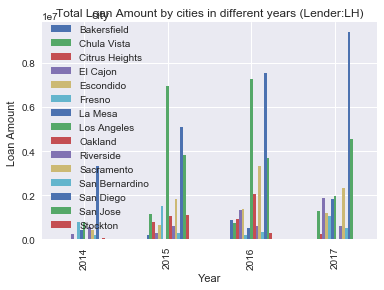

In [13]:
## Look through cities especifically 


LH_bor_city = LH_bor.groupby('city')['loan_amount'].agg(['sum','count','mean'])
LH_bor_city_sorted_sum = LH_bor_city.sort_values('sum' , ascending = False)
LH_bor_city_sorted_mean = LH_bor_city.sort_values('mean' , ascending = False)
LH_bor_city_sorted_count = LH_bor_city.sort_values('count' , ascending = False)



print (LH_bor_city_sorted_sum.head(15))
print (LH_bor_city_sorted_count.head(15))
print (LH_bor_city_sorted_mean.head(15))


# Doing Specific Analysis on top cities 

LH_bor_city_top_list = LH_bor_city_sorted_count.index.values.tolist()[:15]
print (LH_bor_city_top_list)

LH_bor_city_top = LH_bor[LH_bor['city'].isin(LH_bor_city_top_list)]
LH_bor_city_top_year = LH_bor_city_top.groupby([LH_bor_city_top.transaction_date.dt.year, LH_bor_city_top.city])['loan_amount'].agg(['sum','count','mean'])
print (LH_bor_city_top_year)


LH_bor_city_top_year_sorted =LH_bor_city_top_year.reset_index().sort_values(['transaction_date','sum'], ascending='True').set_index(['transaction_date','city'])
print (LH_bor_city_top_year_sorted )

#LH_bor_city_altadena = LH_bor[LH_bor['city']=='Altadena']
#print (LH_bor_city_altadena.head(8))

# Plot Grwoth (Toatl oan Amount) in different cities through years 

LH_bor_city_top_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Loan Amount ')
plt.title('Total Loan Amount by cities in different years (Lender:LH)')
plt.suptitle("")
plt.show()

                                       sum  count           mean
buyer                                                           
KARMA CAPITAL LLC               13511062.0     36  375307.277778
REO CAPITAL FUND 4 LLC          11279300.0     27  417751.851852
APOLLO REALTY INVESTMENTS LLC    6937955.0     21  330378.809524
NEXT LEVEL PROPERTY INVS LLC     7306600.0     19  384557.894737
FPB WEST HOLDINGS INC            5135900.0     17  302111.764706
TFS INVS LLC                     1208200.0     12  100683.333333
GF SERVICES LLC                  4295300.0     11  390481.818182
NEXT LEVEL PROPERTY INVESTMENT   2695700.0      9  299522.222222
TWO WEEKS INC                    6862300.0      9  762477.777778
APOLLO REALTY INVS II LLC        2921800.0      8  365225.000000
KP INVESTMENTS LLC               1810900.0      8  226362.500000
ACROPOLIS CAPITAL LLC            3429100.0      8  428637.500000
WHITE HAWK PROPERTIES            1324331.0      8  165541.375000
DELTA REALTY LLC         

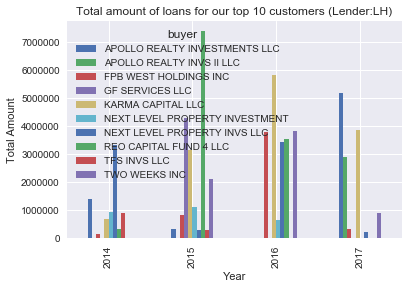

                                      count         sum
transaction_date region                                
2014             Bay Area                 1    340700.0
                 Central Coast            2    429800.0
                 Central Valley           9    917000.0
                 Southern Border          6   1659300.0
                 Southern California     12   4453800.0
2015             Bay Area                 4   1455400.0
                 Central Valley           5    876400.0
                 Northern California      2    263100.0
                 Southern Border         13   4531400.0
                 Southern California     30  12698300.0
2016             Bay Area                 6   1936800.0
                 Central Coast            1    633700.0
                 Central Valley           1    231000.0
                 None                     1    302000.0
                 Southern Border         16   6525012.0
                 Southern California     26  114

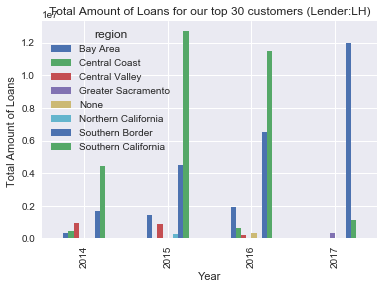

                                                                     count        sum
transaction_date buyer                          region                               
2014             APOLLO REALTY INVESTMENTS LLC  Southern Border          5  1408100.0
                 FPB WEST HOLDINGS INC          Southern California      1   174000.0
                 KARMA CAPITAL LLC              Central Coast            2   429800.0
                                                Southern Border          1   251200.0
                 NEXT LEVEL PROPERTY INVESTMENT Southern California      4   933500.0
                 NEXT LEVEL PROPERTY INVS LLC   Southern California      7  3346300.0
                 REO CAPITAL FUND 4 LLC         Bay Area                 1   340700.0
                 TFS INVS LLC                   Central Valley           9   917000.0
2015             APOLLO REALTY INVESTMENTS LLC  Southern Border          1   337500.0
                 FPB WEST HOLDINGS INC          Bay Ar

In [16]:
### Loyal Customers (most common buyers)

LH_bor_buyer = LH_bor.groupby('buyer')['loan_amount'].agg(['sum','count','mean'])

LH_bor_buyer_sorted_sum = LH_bor_buyer.sort_values('sum', ascending=False)
LH_bor_buyer_sorted_count = LH_bor_buyer.sort_values('count', ascending=False)
#print (LH_bor_buyer_sorted_sum.head(40))
print (LH_bor_buyer_sorted_count.head(45))

# Separate top buyers 

LH_bor_buyer_top30_list = LH_bor_buyer_sorted_count.index.values.tolist()[:10]
LH_bor_buyer_top30 =  LH_bor[LH_bor['buyer'].isin(LH_bor_buyer_top30_list)]

print (sum(LH_bor_buyer_top30.loan_amount)/sum(LH_bor.loan_amount))


# General relationship with top customers through time 

LH_bor_buyer_top30_year = LH_bor_buyer_top30.groupby([LH_bor_buyer_top30.transaction_date.dt.year, LH_bor_buyer_top30.buyer])['loan_amount'].agg(['sum','count','mean'])
print (LH_bor_buyer_top30_year)


#print (LH_bor_buyer_top30.groupby([LH_bor_buyer_top30.transaction_date.dt.year, LH_bor_buyer_top30.buyer])['region'].agg(['sum']))

# Visualiz it 

LH_bor_buyer_top30_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Total amount of loans for our top 10 customers (Lender:LH)')
plt.suptitle("")
plt.show()


# Region of our loyal customers 

# Region of all loyal customers together

LH_bor_buyer_all_top30_region_year = LH_bor_buyer_top30.groupby ([LH_bor_buyer_top30.transaction_date.dt.year, LH_bor_buyer_top30.region])['loan_amount'].agg(['count','sum'])
print (LH_bor_buyer_all_top30_region_year)

LH_bor_buyer_all_top30_region_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Amount of Loans ')
plt.title('Total Amount of Loans for our top 30 customers (Lender:LH)')
plt.suptitle("")
plt.show()

# Region of our loyal customers one by one 

LH_bor_buyer_top30_region_year = LH_bor_buyer_top30.groupby([LH_bor_buyer_top30.transaction_date.dt.year, LH_bor_buyer_top30.buyer, LH_bor_buyer_top30.region])['loan_amount'].agg(['count','sum'])
print (LH_bor_buyer_top30_region_year.head(60))





                 transaction_amount   loan_amount
                                sum           sum
transaction_date                                 
2012                     7718417087  1.763958e+09
2013                    14051807081  3.484026e+09
2014                    13318386628  3.866734e+09
2015                    12802712378  3.768855e+09
2016                    11079868356  3.280470e+09
2017                     4702270005  1.190484e+09


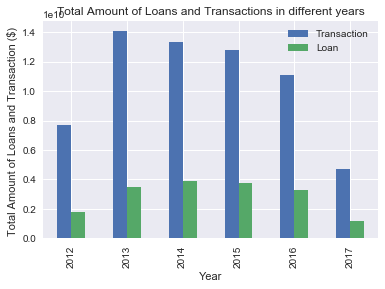

                 transaction_amount loan_amount
                                sum         sum
transaction_date                               
2014                       25135100  16850100.0
2015                       97777464  85508800.0
2016                       94993108  82486312.0
2017                       75893273  67911522.0


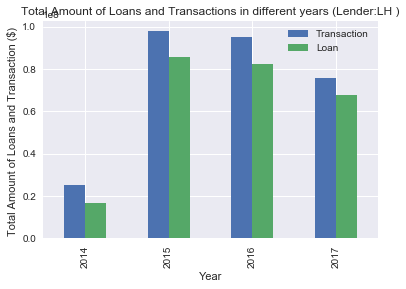

In [18]:
# 1- Transaction trend through years for all lenders 


# All 
transaction_loan_all_year = df.groupby([df.transaction_date.dt.year])['transaction_amount','loan_amount'].agg(['sum'])
print (transaction_loan_all_year)

#Visualize 

transaction_loan_all_year.plot(kind='bar' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Amount of Loans and Transaction ($) ')
plt.title('Total Amount of Loans and Transactions in different years')
plt.suptitle("")
plt.legend (["Transaction","Loan"])
plt.show()


# LH
transaction_loan_LH_bor_year = LH_bor.groupby([LH_bor.transaction_date.dt.year])['transaction_amount','loan_amount'].agg(['sum'])
print (transaction_loan_LH_bor_year)

# Visualize 

transaction_loan_LH_bor_year.plot(kind='bar' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Amount of Loans and Transaction ($) ')
plt.title('Total Amount of Loans and Transactions in different years (Lender:LH )')
plt.suptitle("")
plt.legend (["Transaction","Loan"])
plt.show()


0.24590489051
                                                       sum  count           mean
transaction_date buyer                                                          
2014             APOLLO REALTY INVESTMENTS LLC   1408100.0      5  281620.000000
                 FPB WEST HOLDINGS INC            174000.0      1  174000.000000
                 KARMA CAPITAL LLC                681000.0      3  227000.000000
                 NEXT LEVEL PROPERTY INVESTMENT   933500.0      4  233375.000000
                 NEXT LEVEL PROPERTY INVS LLC    3346300.0      7  478042.857143
                 REO CAPITAL FUND 4 LLC           340700.0      1  340700.000000
                 TFS INVS LLC                     917000.0      9  101888.888889
2015             APOLLO REALTY INVESTMENTS LLC    337500.0      1  337500.000000
                 FPB WEST HOLDINGS INC            846500.0      4  211625.000000
                 GF SERVICES LLC                 4295300.0     11  390481.818182
              

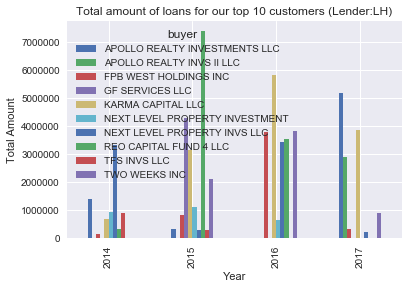

In [19]:
### Loyal Customers (most common buyers)

LH_bor_buyer = LH_bor.groupby('buyer')['loan_amount'].agg(['sum','count','mean'])

LH_bor_buyer_sorted_sum = LH_bor_buyer.sort_values('sum', ascending=False)
LH_bor_buyer_sorted_count = LH_bor_buyer.sort_values('count', ascending=False)
#print (LH_bor_buyer_sorted_sum.head(40))
#print (LH_bor_buyer_sorted_count.head(45))

# Separate top buyers 

LH_bor_buyer_top10_list = LH_bor_buyer_sorted_count.index.values.tolist()[:10]
LH_bor_buyer_top10 =  LH_bor[LH_bor['buyer'].isin(LH_bor_buyer_top10_list)]

print (sum(LH_bor_buyer_top10.loan_amount)/sum(LH_bor.loan_amount))


# General relationship with top customers through time 

LH_bor_buyer_top10_year = LH_bor_buyer_top10.groupby([LH_bor_buyer_top10.transaction_date.dt.year, LH_bor_buyer_top10.buyer])['loan_amount'].agg(['sum','count','mean'])
print (LH_bor_buyer_top10_year)

LH_bor_buyer_top30_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Total amount of loans for our top 10 customers (Lender:LH)')
plt.suptitle("")
plt.show()

# Top customers activities with us in different regions 
#print (LH_bor_buyer_top10.groupby([LH_bor_buyer_top10.transaction_date.dt.year, LH_bor_buyer_top10.buyer , LH_bor_buyer_top10.region])['loan_amount'].agg(['sum']))

                                                        sum  count           mean
transaction_date buyer                                                           
2012             FPB WEST HOLDINGS INC             126000.0      2   63000.000000
                 GF SERVICES LLC                  3548075.0     26  136464.423077
                 NEXT LEVEL PROPERTY INVESTMENT         0.0      3       0.000000
                 NEXT LEVEL PROPERTY INVS LLC      300000.0      6   50000.000000
                 TFS INVS LLC                           0.0      1       0.000000
2013             FPB WEST HOLDINGS INC            3692750.0     21  175845.238095
                 GF SERVICES LLC                 12795450.0     68  188168.382353
                 NEXT LEVEL PROPERTY INVESTMENT    875000.0     24   36458.333333
                 NEXT LEVEL PROPERTY INVS LLC     5320000.0     31  171612.903226
                 TFS INVS LLC                           0.0      9       0.000000
2014            

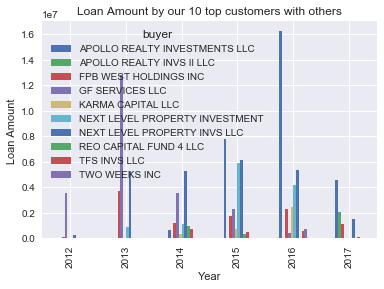

                                                        sum  count           mean
transaction_date buyer                                                           
2012             FPB WEST HOLDINGS INC             126000.0      2   63000.000000
                 GF SERVICES LLC                  3548075.0     26  136464.423077
                 NEXT LEVEL PROPERTY INVESTMENT         0.0      3       0.000000
                 NEXT LEVEL PROPERTY INVS LLC      300000.0      6   50000.000000
                 TFS INVS LLC                           0.0      1       0.000000
2013             FPB WEST HOLDINGS INC            3692750.0     21  175845.238095
                 GF SERVICES LLC                 12795450.0     68  188168.382353
                 NEXT LEVEL PROPERTY INVESTMENT    875000.0     24   36458.333333
                 NEXT LEVEL PROPERTY INVS LLC     5320000.0     31  171612.903226
                 TFS INVS LLC                           0.0      9       0.000000
2014            

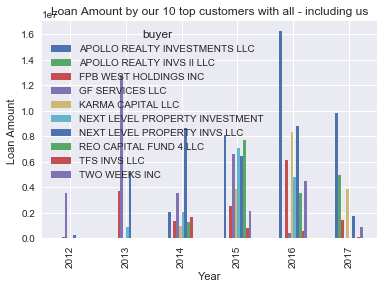

In [20]:
# Check if our top 10 buyers do some transactions with others or not .

Non_LH_bor = df[df["lender"] != 'LendingHome']
Non_LH_bor_buyer_top10 = Non_LH_bor[Non_LH_bor['buyer'].isin(LH_bor_buyer_top10_list)]
Non_LH_bor_buyer_top10_year = Non_LH_bor_buyer_top10.groupby([Non_LH_bor_buyer_top10.transaction_date.dt.year, Non_LH_bor_buyer_top10.buyer])['loan_amount'].agg(['sum','count','mean'])
print (Non_LH_bor_buyer_top10_year)

# Visualize 
Non_LH_bor_buyer_top10_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Loan Amount ')
plt.title('Loan Amount by our 10 top customers with others')
plt.suptitle("")
plt.show()



# Our big customer overal trend 

df_buyer_top10 = df[df['buyer'].isin(LH_bor_buyer_top10_list)]
df_buyer_top10_year = df_buyer_top10.groupby([df_buyer_top10.transaction_date.dt.year , df_buyer_top10.buyer])['loan_amount'].agg(['sum','count','mean'])
print (df_buyer_top10_year)

df_buyer_top10_year.unstack(level=1).plot(kind='bar' , y='sum' ,subplots=False)
plt.xlabel('Year')
plt.ylabel('Loan Amount ')
plt.title('Loan Amount by our 10 top customers with all - including us')
plt.suptitle("")
plt.show()

